In [1]:
%matplotlib
import sys
import os
from io import StringIO
sys.path.append('./Common')
sys.path.append('./Conf')
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from getDataPD import getDataPD, getMlData
from sklearn.model_selection import train_test_split
import io
from PIL import Image
from configparser import ConfigParser
from mysql.connector import MySQLConnection, Error

Using matplotlib backend: Qt5Agg


# data load

In [ ]:
# for pds in ['void', 'surface', 'coronaP', 'coronaN']:

#     if pds=='void':
#         ind = np.random.choice(range(1,8343), size = 5000, replace=False) 
#         void_sql = " SELECT * " +\
#               " FROM pd_dgdgr_train_data " +\
#               " WHERE DATA_SERNO > 124  && 
#         void = getMlData(void_sql)

#     elif pds =='surface':
#         ind = np.random.choice(range(8384, 16687), size=5000, replace=False)  
#         surface_sql = " SELECT * " +\
#               " FROM pd_classf_train_data " +\
#               " WHERE DATA_SERNO IN" +str(tuple(ind))
#         surface = getMlData(surface_sql)
    
#     elif pds == 'coronaP':
#         ind = np.random.choice(range(16687, 25031), size=5000, replace=False)  
#         coronaP_sql = " SELECT * " +\
#               " FROM pd_classf_train_data " +\
#               " WHERE DATA_SERNO IN" + str(tuple(ind))
#         coronaP = getMlData(coronaP_sql)
        
#     else:
#         ind = np.random.choice(range(25031, 32482), size=5000, replace=False)  
#         coronaN_sql = " SELECT * " +\
#               " FROM pd_classf_train_data " +\
#               " WHERE DATA_SERNO IN " +str(tuple(ind))
#         coronaN = getMlData(coronaN_sql)


In [74]:
void_sql = " SELECT * " +\
      " FROM pd_dgdgr_train_data " +\
      " WHERE DATA_SERNO > 124  && PD_PTRN_CD ='Void'"
void = getMlData(void_sql)

In [75]:
void

,DATA_SERNO,COLEC_DATM,PD_PTRN_CD,AVG_PD_VALUE,MAX_PD_VALUE
0,125,2000-01-01,Void,15.69,95.95
1,126,2000-01-02,Void,15.18,95.44
2,127,2000-01-03,Void,15.05,95.31
3,128,2000-01-04,Void,15.52,95.78
4,129,2000-01-05,Void,15.30,95.56
5,130,2000-01-06,Void,15.18,95.44
6,131,2000-01-07,Void,14.89,95.15
7,132,2000-01-08,Void,15.66,95.92
8,133,2000-01-09,Void,15.57,95.83
9,134,2000-01-10,Void,15.10,95.36


In [76]:
void_data = np.array(void)

In [77]:
void_data

array([[125, Timestamp('2000-01-01 00:00:00'), 'Void', 15.69, 95.95],
       [126, Timestamp('2000-01-02 00:00:00'), 'Void', 15.18, 95.44],
       [127, Timestamp('2000-01-03 00:00:00'), 'Void', 15.05, 95.31],
       [128, Timestamp('2000-01-04 00:00:00'), 'Void', 15.52, 95.78],
       [129, Timestamp('2000-01-05 00:00:00'), 'Void', 15.3, 95.56],
       [130, Timestamp('2000-01-06 00:00:00'), 'Void', 15.18, 95.44],
       [131, Timestamp('2000-01-07 00:00:00'), 'Void', 14.89, 95.15],
       [132, Timestamp('2000-01-08 00:00:00'), 'Void', 15.66, 95.92],
       [133, Timestamp('2000-01-09 00:00:00'), 'Void', 15.57, 95.83],
       [134, Timestamp('2000-01-10 00:00:00'), 'Void', 15.1, 95.36],
       [135, Timestamp('2000-01-11 00:00:00'), 'Void', 15.69, 95.95],
       [136, Timestamp('2000-01-12 00:00:00'), 'Void', 15.69, 95.95],
       [137, Timestamp('2000-01-13 00:00:00'), 'Void', 15.56, 95.82],
       [138, Timestamp('2000-01-14 00:00:00'), 'Void', 15.46, 95.72],
       [139, Timestamp

In [78]:
data = void_data[:,[3,4]]

In [79]:
def MinMaxScaler(data):
    bunja = data - np.min(data, 0)
    bunmo = np.max(data,0) - np.min(data,0)
    return bunja/bunmo+1e-10

In [80]:
data_ = MinMaxScaler(data)

In [81]:
data_

array([[0.0039125911509885515, 0.0058753673104506385],
       [0.0017898023892819967, 0.002687668079248657],
       [0.0012486993715920946, 0.0018751172948246588],
       [0.0032049948970863666, 0.004812800900049978],
       [0.0022892820979188377, 0.0034377149571785557],
       [0.0017898023892819967, 0.002687668079248657],
       [0.0005827264267429785, 0.0008750547909181859],
       [0.0037877212238293452, 0.005687855590968164],
       [0.003413111442351718, 0.005125320432520739],
       [0.0014568159168574387, 0.0021876368272954203],
       [0.0039125911509885515, 0.0058753673104506385],
       [0.0039125911509885515, 0.0058753673104506385],
       [0.003371488133298649, 0.005062816526026552],
       [0.0029552550427679536, 0.004437777461085028],
       [1e-10, 1e-10],
       [0.000707596353902185, 0.0010625665104006606],
       [0.003121748278980229, 0.00468779308706169],
       [0.0039542144600416195, 0.005937871216944737],
       [0.0032466182061394355, 0.004875304806544165],
  

In [62]:
#저장
np.savetxt('predict_data.txt',data_,)

In [1]:
%matplotlib
import sys
import os
from io import StringIO
sys.path.append('./Common')
sys.path.append('./Conf')
import tensorflow as tf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import datetime 
import numpy as np
from getDataPD import getDataPD, getMlData
from sklearn.model_selection import train_test_split
import io
from PIL import Image
from configparser import ConfigParser
from mysql.connector import MySQLConnection, Error

Using matplotlib backend: Qt5Agg


In [41]:
#불러오기
data = np.loadtxt('predict_data.txt',encoding='utf-8')
data

array([[3.91259115e-03, 5.87536731e-03],
       [1.78980239e-03, 2.68766808e-03],
       [1.24869937e-03, 1.87511729e-03],
       [3.20499490e-03, 4.81280090e-03],
       [2.28928210e-03, 3.43771496e-03],
       [1.78980239e-03, 2.68766808e-03],
       [5.82726427e-04, 8.75054791e-04],
       [3.78772122e-03, 5.68785559e-03],
       [3.41311144e-03, 5.12532043e-03],
       [1.45681592e-03, 2.18763683e-03],
       [3.91259115e-03, 5.87536731e-03],
       [3.91259115e-03, 5.87536731e-03],
       [3.37148813e-03, 5.06281653e-03],
       [2.95525504e-03, 4.43777746e-03],
       [1.00000000e-10, 1.00000000e-10],
       [7.07596354e-04, 1.06256651e-03],
       [3.12174828e-03, 4.68779309e-03],
       [3.95421446e-03, 5.93787122e-03],
       [3.24661821e-03, 4.87530481e-03],
       [5.82726427e-04, 8.75054791e-04],
       [2.91363173e-03, 4.37527355e-03],
       [1.78980239e-03, 2.68766808e-03],
       [7.90842972e-04, 1.18757432e-03],
       [2.49739864e-03, 3.75023449e-03],
       [3.329865

In [42]:
data.shape

(120, 2)

In [3]:
x = data
y = data[:,[0]]

In [4]:
seq_length = 7
data_dim = 2
hidden_dim = 10
output_dim = 1
learning_rate = 1e-5


data_ = data[::-1]
data_x =[]
data_y =[]

for i in range(0, len(y) - seq_length):
    _x = x[i: i+seq_length]
    _y = y[i+seq_length]
    data_x.append(_x)
    data_y.append(_y)
    
train_size = int(len(data_y)*0.7)
test_size = len(data_y) - train_size

train_x, test_x = np.array(data_x[0: train_size]) , np.array(data_x[train_size:])
train_y, test_y = np.array(data_y[0: train_size]) , np.array(data_y[train_size:])

In [5]:
X = tf.placeholder(tf.float32 , shape=[None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, shape = [None, 1])

cell = tf.contrib.rnn.BasicLSTMCell(num_units = hidden_dim, activation = tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype = tf.float32)
y_pred = tf.contrib.layers.fully_connected(inputs = outputs[:,0], num_outputs = output_dim,
                                         activation_fn=None)

loss = tf.reduce_mean(tf.reduce_sum(tf.square(Y - y_pred)))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [7]:
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())

for i in range(30000):
    cost, _ =sess.run([loss, optimizer], feed_dict={X:train_x, Y:train_y})
    
    if i % 5000==0:
        print('iter : {}, cost : {}'.format(i,cost))

iter : 0, cost : 0.010511520318686962
iter : 5000, cost : 0.010314769111573696
iter : 10000, cost : 0.01010792888700962
iter : 15000, cost : 0.009887597523629665
iter : 20000, cost : 0.00965566374361515
iter : 25000, cost : 0.009417504072189331


In [99]:
target = tf.placeholder(tf.float32, [None,1])
prediction = tf.placeholder(tf.float32 , [None,1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(target - prediction)))

In [100]:
lstm_pred = sess.run(y_pred , feed_dict={X:test_x})
print('rmse : ', sess.run(rmse, feed_dict={target : test_y, prediction: lstm_pred}))

TypeError: float() argument must be a string or a number, not 'Timestamp'

<Figure size 432x288 with 0 Axes>

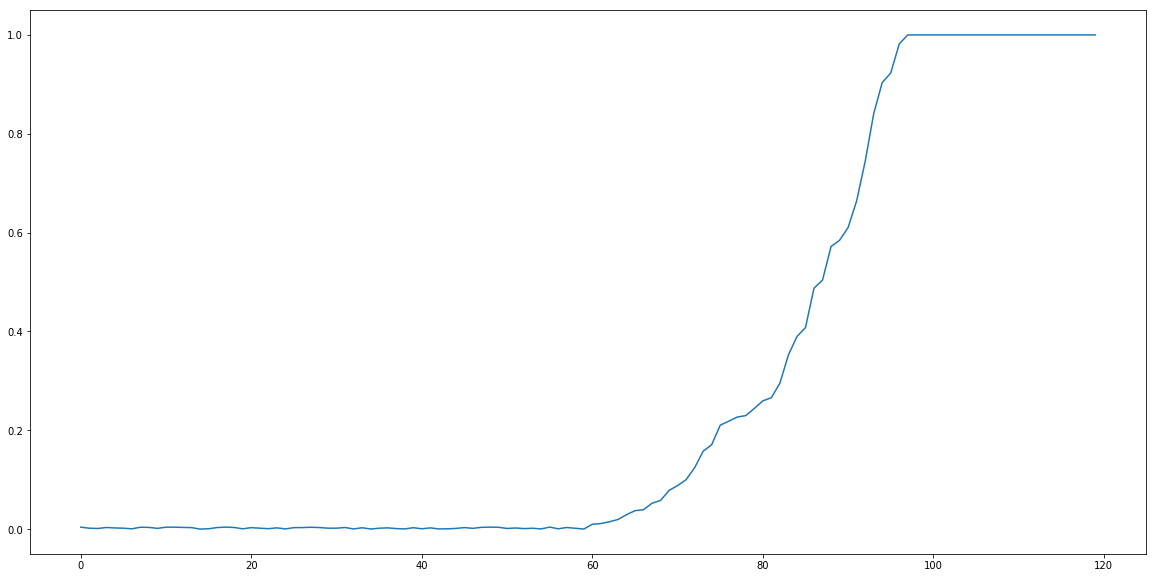

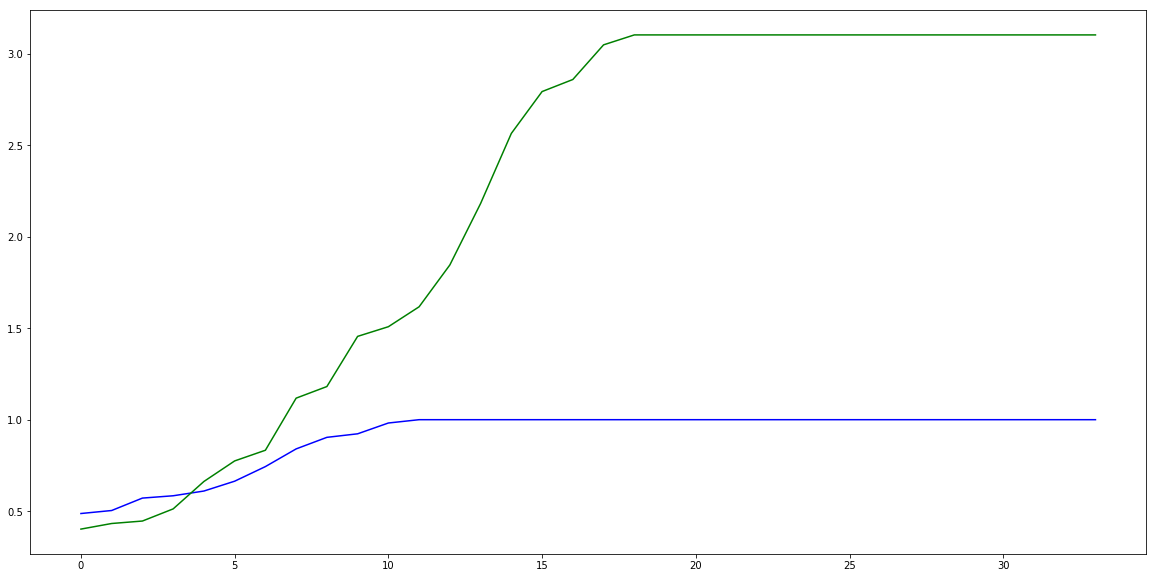

In [12]:
plt.clf()
plt.figure(figsize=(20,10))
plt.plot(data[:,0])
plt.figure(figsize=(20,10))
plt.plot(test_y, color='b')
plt.plot(test_prediction, color='g')

In [102]:
lstm_pred = test_prediction

# let's go to ARIMA

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA

In [18]:
data_arima = data[:,0]

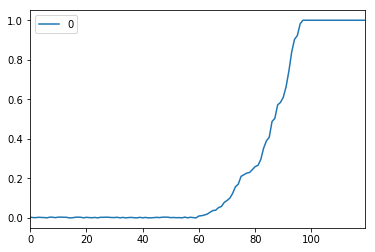

In [25]:
#오리지널 이렇게 생김
arima = pd.DataFrame(data_arima)
arima.plot()

C:\Users\SF-1300F14MG\Anaconda3\envs\dki\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


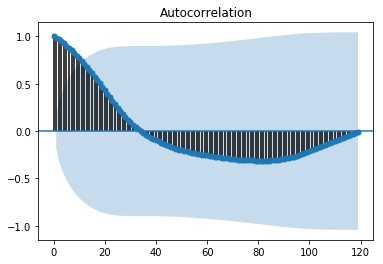

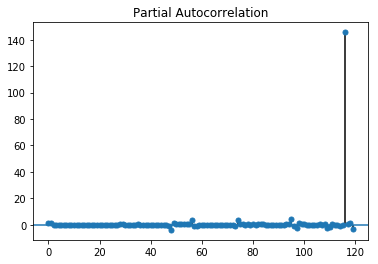

In [26]:
plot_acf(arima)
plot_pacf(arima)
plt.show()

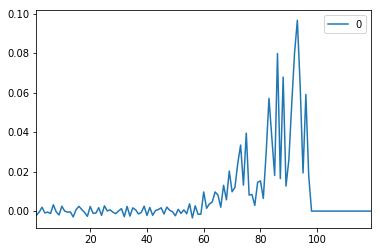

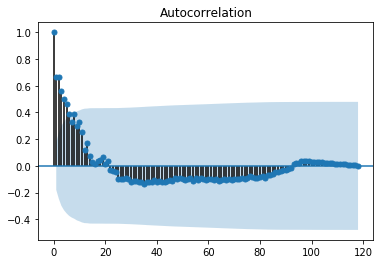

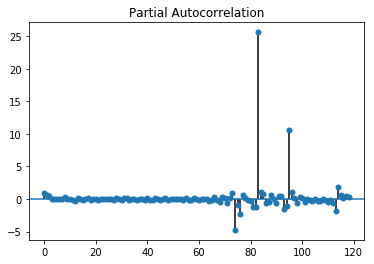

In [29]:
# 1차 차분
diff_1 = arima.diff(periods=1).iloc[1:]
diff_1.plot()
plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

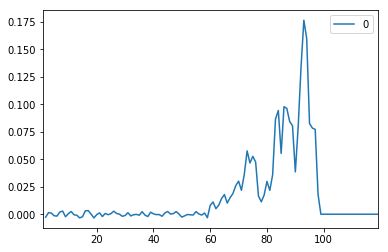

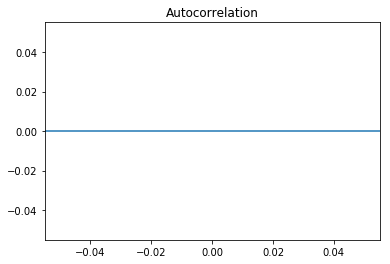

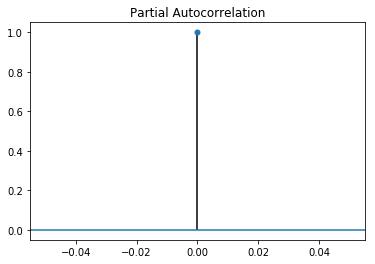

In [35]:
# 2차 차분
diff_2 = arima.diff(periods=2).iloc[1:]
diff_2.plot()
plot_acf(diff_2)
plot_pacf(diff_2)
plt.show()

# ARIMA MODELING

In [51]:
arima_pd = void[['COLEC_DATM','AVG_PD_VALUE']]

In [83]:
AVG_PD_SCALE = MinMaxScaler(void['AVG_PD_VALUE'])

In [121]:
arima_pd = pd.concat([void['COLEC_DATM'], AVG_PD_SCALE],axis=1)

In [122]:
train_x = arima_pd[:79]
test_x = arima_pd[79:]
print(len(test_x))

41


In [123]:
train_x

,COLEC_DATM,AVG_PD_VALUE
0,2000-01-01,3.912591e-03
1,2000-01-02,1.789802e-03
2,2000-01-03,1.248699e-03
3,2000-01-04,3.204995e-03
4,2000-01-05,2.289282e-03
5,2000-01-06,1.789802e-03
6,2000-01-07,5.827264e-04
7,2000-01-08,3.787721e-03
8,2000-01-09,3.413111e-03
9,2000-01-10,1.456816e-03


In [96]:
model = ARIMA(train_x['AVG_PD_VALUE'],dates= train_x['COLEC_DATM'], order=(0,1,1))
model_fit = model.fit(trend='c', full_output=True, disp=1)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.AVG_PD_VALUE   No. Observations:                   78
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 279.128
Method:                       css-mle   S.D. of innovations              0.007
Date:                Wed, 27 Feb 2019   AIC                           -552.256
Time:                        17:32:46   BIC                           -545.186
Sample:                    01-02-2000   HQIC                          -549.426
                         - 03-19-2000                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0029      0.001      2.882      0.005       0.001       0.005
ma.L1.D.AVG_PD_VALUE     0.3066      0.078      3.921      0.000       0.153       0.460
            

C:\Users\SF-1300F14MG\Anaconda3\envs\dki\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
C:\Users\SF-1300F14MG\Anaconda3\envs\dki\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [97]:
arima_pred = model_fit.forecast(steps=34)
arima_pred[0]

array([0.23182051, 0.23469012, 0.23755973, 0.24042934, 0.24329895,
       0.24616855, 0.24903816, 0.25190777, 0.25477738, 0.25764699,
       0.26051659, 0.2633862 , 0.26625581, 0.26912542, 0.27199503,
       0.27486463, 0.27773424, 0.28060385, 0.28347346, 0.28634307,
       0.28921267, 0.29208228, 0.29495189, 0.2978215 , 0.3006911 ,
       0.30356071, 0.30643032, 0.30929993, 0.31216954, 0.31503914,
       0.31790875, 0.32077836, 0.32364797, 0.32651758])

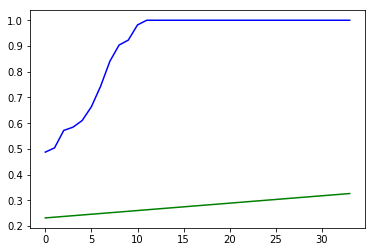

In [98]:
plt.plot(test_y, color='b')
plt.plot(arima_pred[0], color='g')

In [119]:
ensemble  = 0.3*arima_pred[0].reshape(34,1) + 0.7*lstm_pred

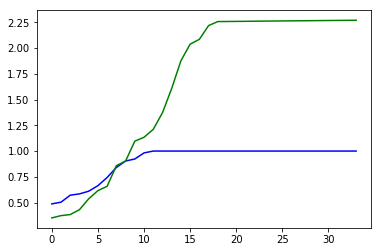

In [120]:
plt.plot(test_y, color='b')
plt.plot(ensemble, color='g')

# time to PBProphet

In [124]:
from fbprophet import Prophet

In [126]:
fb_pd =arima_pd.rename(columns={'COLEC_DATM': 'ds', 'AVG_PD_VALUE':'y'})

In [127]:
fb = Prophet(weekly_seasonality=True, daily_seasonality=True)
fb.fit(fb_pd)

C:\Users\SF-1300F14MG\Anaconda3\envs\dki\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\SF-1300F14MG\Anaconda3\envs\dki\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [128]:
period = fb.make_future_dataframe(periods=34)
fb_pred = fb.predict(period)

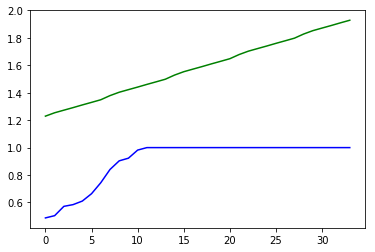

In [145]:
#예측구간( periods = 34 기준)
plt.plot(test_y, color='b')
plt.plot(fb_pred['yhat'][-34:].values, color = 'g')

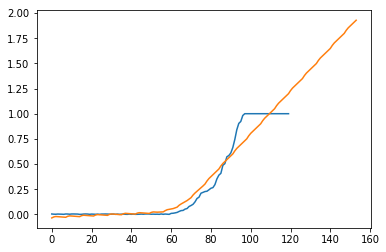

In [144]:
#전체적으로 봤을떄
plt.plot(arima_pd['AVG_PD_VALUE'])
plt.plot(fb_pred['yhat'])

# 앙상블 합체!!!!!!!!!!!!!!

In [154]:
ensemble_ = 0.33* lstm_pred + 0.33* np.array(fb_pred['yhat'][-34:]).reshape(-1,1) + 0.33* arima_pred[0].reshape(34,1) 

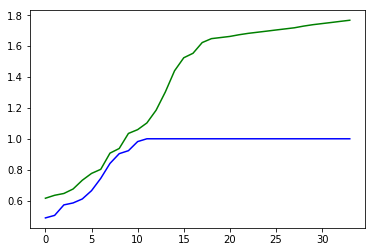

In [155]:
plt.plot(test_y, color='b')
plt.plot(ensemble_, color = 'g')